<a href="https://colab.research.google.com/github/Rizki-132/Allmateri/blob/main/Belajar_Polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Polynomial features

* Diabetes Datasets
1. age
1. sex
1. body mass index (bmi)
1. Average Blood preasure (bp)

In [27]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd

Target : Progression (Numeric assesment of the progression of the disease in a years )

In [4]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Preogression'] = data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Preogression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


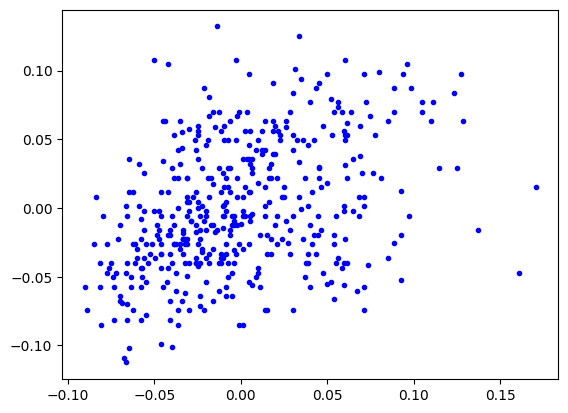

In [5]:
import matplotlib.pyplot as plt

plt.plot(df['bmi'], df['bp'], 'b.')

plt.show()

Polynomial Exercise 1

X = bmi

yang akan d prediksi

y = bp

In [30]:
#features itu harus array 2 dimensi kurung siku nya harus 2 [[]]
X = df[['bmi']]
y = df['bp']

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [32]:
X_poly

array([[ 6.16962065e-02,  3.80642190e-03,  2.34841792e-04, ...,
         2.09926707e-10,  1.29516815e-11,  7.99069614e-13],
       [-5.14740612e-02,  2.64957898e-03, -1.36384591e-04, ...,
         4.92841737e-11, -2.53685657e-12,  1.30582311e-13],
       [ 4.44512133e-02,  1.97591037e-03,  8.78316133e-05, ...,
         1.52429477e-11,  6.77567520e-13,  3.01186984e-14],
       ...,
       [-1.59062628e-02,  2.53009196e-04, -4.02443077e-06, ...,
         4.09774782e-15, -6.51798538e-17,  1.03676788e-18],
       [ 3.90621530e-02,  1.52585179e-03,  5.96030562e-05, ...,
         5.42062559e-12,  2.11741306e-13,  8.27107128e-15],
       [-7.30303027e-02,  5.33342511e-03, -3.89501651e-04, ...,
         8.09142116e-10, -5.90918936e-11,  4.31549888e-12]])

In [23]:
#Model Linear regression
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_poly, y)

LinearRegression()

In [33]:
#Model ridge
from sklearn.linear_model import Ridge

regression = Ridge()
regression.fit(X_poly, y)

Ridge()

In [38]:
# Model Elastic net
from sklearn.linear_model import ElasticNet
# mencari alpha dan li dengan coba coba supaya mendapatkan error paling rendah

regression = ElasticNet(alpha=2.0, l1_ratio=0.5)
regression.fit(X_poly, y)

ElasticNet(alpha=2.0)

In [39]:
x_line_fitted = np.linspace(X.min(), X.max(), num=100)
y_line_fitted = regression.intercept_

for i in range(len(poly_features.powers_)):
  exponent = poly_features.powers_[i][0]
  y_line_fitted = y_line_fitted + regression.coef_[i] * (x_line_fitted**exponent )

### ElasticNet

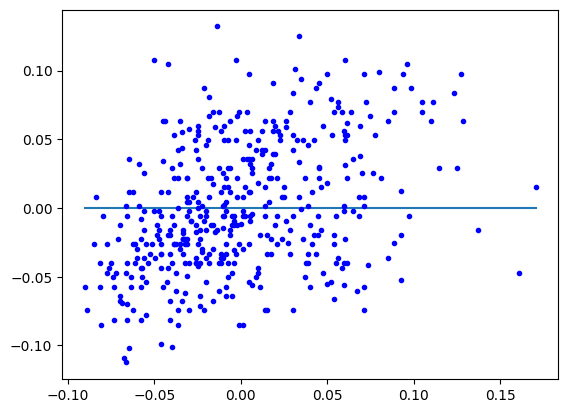

In [40]:
plt.plot(x_line_fitted, y_line_fitted)
plt.plot(X, y, 'b.')
plt.show()

### Ridge Regression

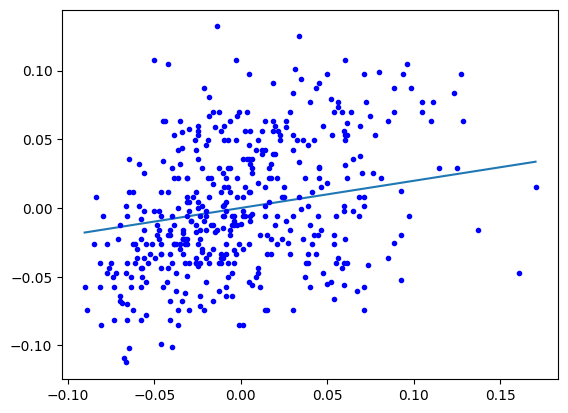

In [35]:
# lebih bagus untuk menangkap pola nya
plt.plot(x_line_fitted, y_line_fitted)
plt.plot(X, y, 'b.')
plt.show()

###  Polynomial Regression


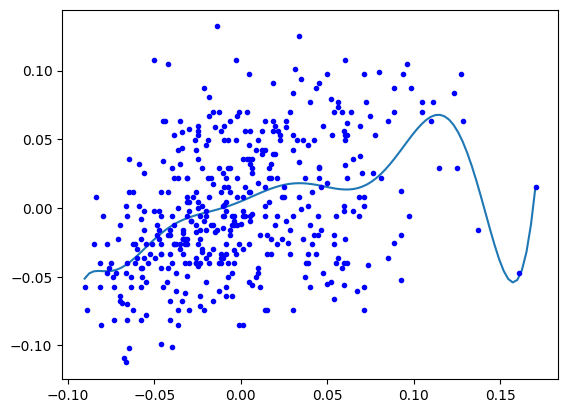

In [16]:
# ini yang menggunakan degree 10 merupakan contoh yang kurang bagus karena terlalu kompleks dan banyak lekukan dan overfit
# ini contoh kompleks model
plt.plot(x_line_fitted, y_line_fitted)
plt.plot(X, y, 'b.')
plt.show()

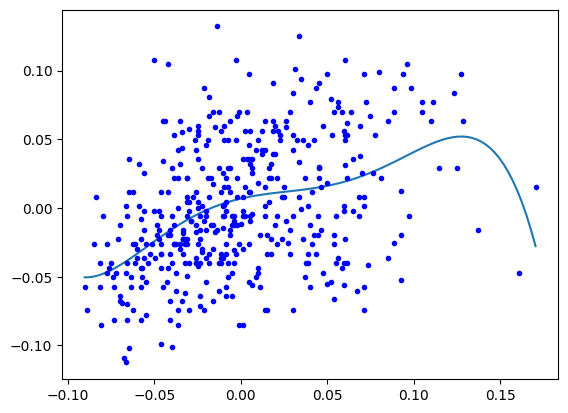

In [20]:
# ini yang menggunakan degree 5
# contoh simpler model
plt.plot(x_line_fitted, y_line_fitted)
plt.plot(X, y, 'b.')
plt.show()

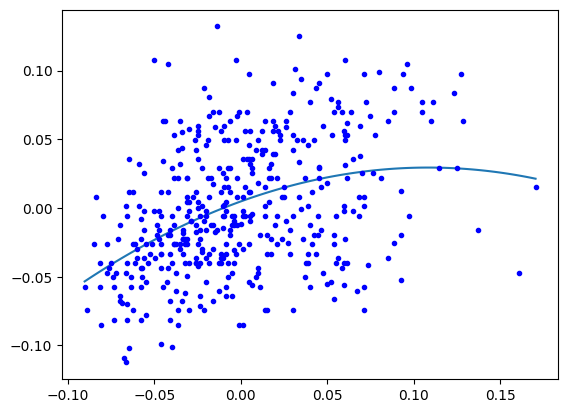

In [26]:
# menggunakan degree 2
# semakin rendah degree semakin simpel
plt.plot(x_line_fitted, y_line_fitted)
plt.plot(X, y, 'b.')
plt.show()

Untuk menggunakan degree harus liat rmse nya

What To explore Next

1. Train Test Split
1. Find the best model with Highest R2 Score By comparing LinearRegresion, Ridge, ElasticNet, Lasso, BayesianRidge.
1. Hypermeter Tuning ( Ridge, Lasso, ElasticNet, BayesianRidge)